   # Bike Sharing Assignment

In [1]:
# Importing all the required libraries and packages 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

### Loading the data

In [2]:
# Loading the data provided into a dataframe
bike=pd.read_csv('day.csv')

In [3]:
# Checking if the datasey is loaded as required in a dataframe
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspecting the dataframe

In [4]:
# Inspecting the shape of the dataframe
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Inspecting the numerical variables of the dataframe
bike .describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Dropping the column named 'instant' as it is nothing but the index 
bike.drop(['instant'],axis=1,inplace=True)

In [8]:
# Checking for null values in the columns of the dataframe
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Verifying if the dates of the month in the dtday column are valid.
bike.dteday.apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [10]:
# Verifying if the number of months is also valid
bike.dteday.apply(lambda x: int(x.split('-')[1])).describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [11]:
bike.dteday.apply(lambda x: int(x.split('-')[2])).describe()

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

In [12]:
# Creating the new column of date and fetching days of the month in that column
bike['Date']=bike.dteday.apply(lambda x: int(x.split('-')[0]))

In [13]:
# Inspecting the new column so formed 
bike.Date.describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: Date, dtype: float64

In [14]:
# Checking the 'mnth' column  
bike.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

In [15]:
# Dropping the 'dteday' column as its contents are well explained by other columns 
bike.drop(['dteday'],axis=1,inplace=True)

In [16]:
# Checking the dataframe again for how it looks
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


## Exploratory data analysis of the dataframe

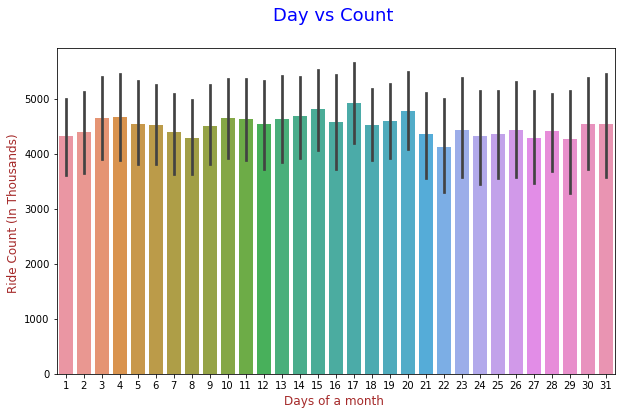

In [17]:
#Ploting the barplot for "day of month" vs the target variable "Count"
plt.figure(figsize=(10,6))
sns.barplot(bike.Date,bike.cnt)
plt.title('Day vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Days of a month ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [18]:
# Dropping the 'Date' column as it seems, it does not have much of significance impact on our target variable
bike.drop('Date',axis=1,inplace=True)

In [19]:
# Reassigning names to the values of column 'season' as provieded in the dictionary
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

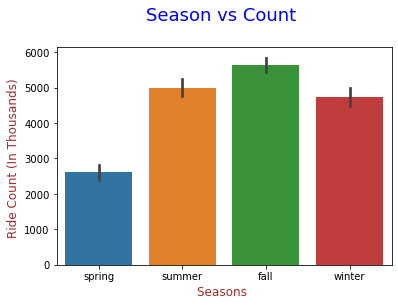

In [20]:
# Plotting a barplot 'season' vs 'count'
sns.barplot(bike.season,bike.cnt)
plt.title('Season vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Seasons ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [21]:
# Renaming the column 'yr' as 'Year'
bike=bike.rename(columns={'yr':'Year'})

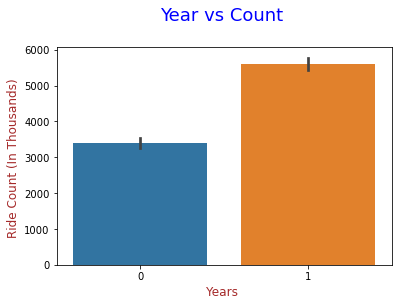

In [22]:
#Plotting barplot 'Year' vs 'count'
sns.barplot(bike.Year,bike.cnt)
plt.title('Year vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Years ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

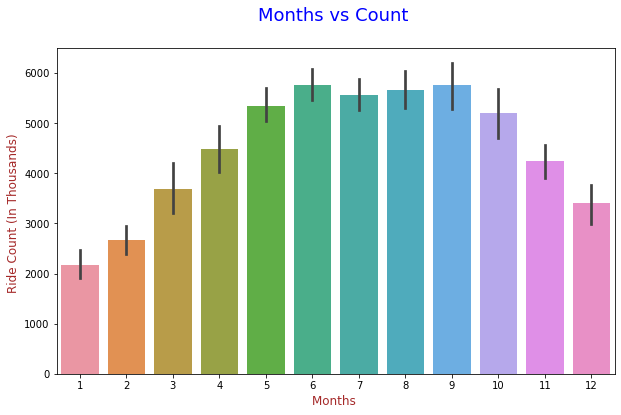

In [23]:
#Plotting barplot Month vs Count
plt.figure(figsize=(10,6))
sns.barplot(bike.mnth,bike.cnt)
plt.title('Months vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Months ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

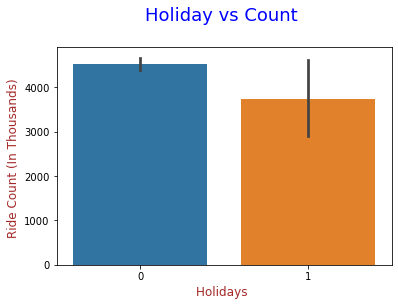

In [24]:
# Plotting barplot Holiday vs Count
sns.barplot(bike.holiday,bike.cnt)
plt.title('Holiday vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Holidays ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

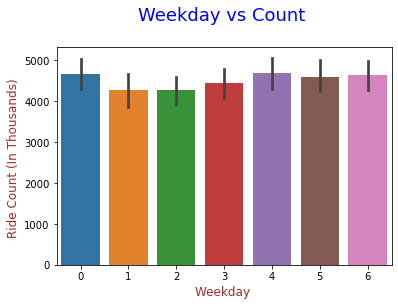

In [25]:
# Plotting barplot weekday vs Count
sns.barplot(bike.weekday,bike.cnt)
plt.title('Weekday vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Weekday ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

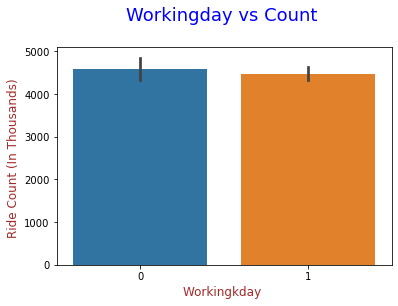

In [26]:
# Plotting barplot of count vs workingday
sns.barplot(bike.workingday,bike.cnt)
plt.title('Workingday vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Workingkday ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [27]:
# Replcing values of the column 'weathersit' as provided in the data dictionary
bike['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

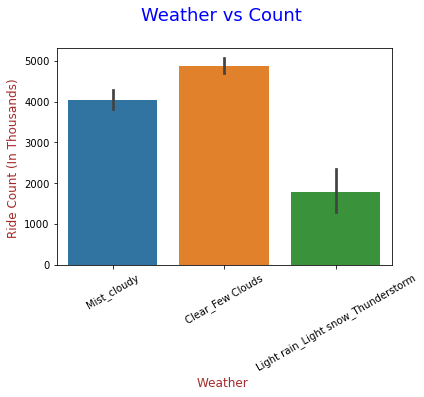

In [28]:
# Plotting barplot of count vs weather
sns.barplot(bike.weathersit,bike.cnt)
plt.title('Weather vs Count \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("Weather ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Ride Count (In Thousands) ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=30)
plt.show()

In [29]:
#Checking the names of the columns in the dataframe
bike.columns

Index(['season', 'Year', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [30]:
# Dropping the columns which are irrelevant as the same information is given by some other column cummulatively
bike.drop(['casual','registered'],axis=1,inplace=True)
# Renaming the columns as felt fit for usage
bike=bike.rename(columns={'mnth':'Month'})
bike=bike.rename(columns={'hum':'Humidity'})
bike=bike.rename(columns={'cnt':'Count'})

In [31]:
# Checking the information of the dataframe after performing all above operations
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [32]:
# Converting the numeric variales to pandas numeric
bike[['temp','atemp','Humidity','windspeed','Count']]=bike[['temp','atemp','Humidity','windspeed','Count']].apply(pd.to_numeric)

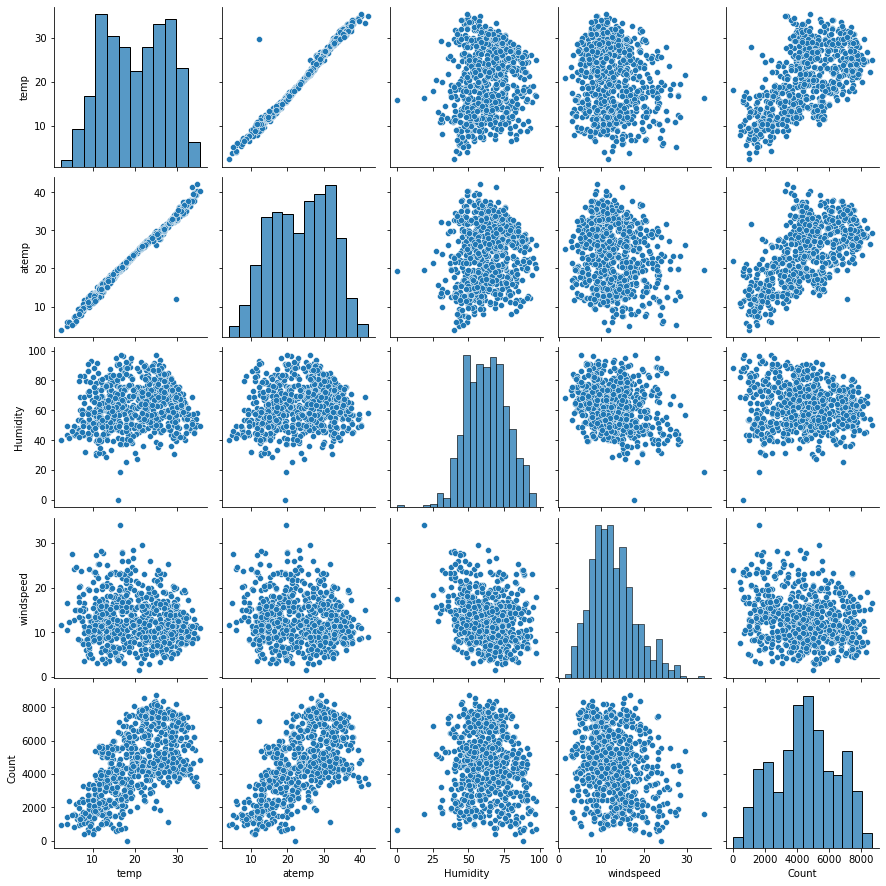

In [33]:
# Plotting the pairplot for the numeric variables
sns.pairplot(bike, vars=['temp','atemp','Humidity','windspeed','Count'])
plt.show()

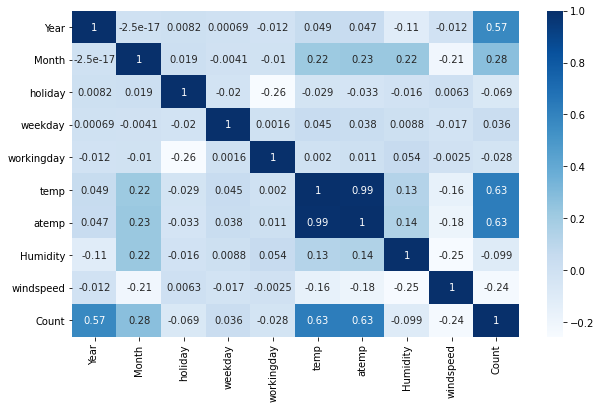

In [34]:
# PLotting the heatmap for checking the correlations of the variables of the dataframe 
plt.figure(figsize=(10,6))
sns.heatmap(bike.corr(), annot=True,cmap='Blues')
plt.show()

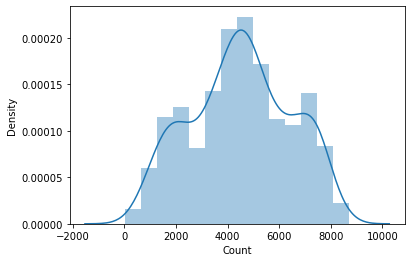

In [35]:
# Checking the values of the target variable is normally distributed
sns.distplot(bike.Count)
plt.show()

In [36]:
# Dropping the variable 'temp' as it is too much correlated with the variable 'atemp'
bike.drop('temp',axis=1,inplace=True)

In [37]:
# Converting  the dtypes of certain variables as saw fit 
bike['season']=bike['season'].astype('object')
bike['weathersit']=bike['weathersit'].astype('object')
bike['Month']=bike['Month'].astype('object')
bike['weekday']=bike['weekday'].astype('object')

In [38]:
bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,atemp,Humidity,windspeed,Count
0,spring,0,1,0,1,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


In [39]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   Humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  Count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [40]:
# Creating the dummies of multiple features that can be useful for the model building
bikedf=pd.get_dummies(bike,drop_first=True)

In [41]:
# Checking the ionfo of new dataframe after creating the dummies 
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   atemp                                          730 non-null    float64
 4   Humidity                                       730 non-null    float64
 5   windspeed                                      730 non-null    float64
 6   Count                                          730 non-null    int64  
 7   season_spring                                  730 non-null    uint8  
 8   season_summer                                  730 non-null    uint8  
 9   season_winter                                  730 non

In [42]:
# Checking the dataframe for how it looks
bikedf.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,...,Month_11,Month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
## Checking the columns of the new dataframe
bikedf.columns

Index(['Year', 'holiday', 'workingday', 'atemp', 'Humidity', 'windspeed',
       'Count', 'season_spring', 'season_summer', 'season_winter', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

### Splitting the dataframe into test and train dataframes

In [44]:
# Splitting the dataframe into test and train dataframes 
np.random.seed(0)
bikedf_train, bikedf_test= train_test_split(bikedf,train_size=0.7,test_size=0.3,random_state=100)

In [45]:
# Checking the train dataframe for how it looks
bikedf_train.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,...,Month_11,Month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Rescaling the features

In [46]:
# Rescaling the numeric variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars=['Humidity','windspeed','Count','atemp']
bikedf_train[num_vars] = scaler.fit_transform(bikedf_train[num_vars])

In [47]:
# Checking the shape of the train dataframe
bikedf_train.shape

(510, 29)

In [48]:
#Checking the shape of test dataframe
bikedf_test.shape

(219, 29)

In [49]:
# Checking the train dataframe for how it looks after rescaling the numeric variables
bikedf_train.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,...,Month_11,Month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
# Checking the description of the train dataframe after rescaling for reassurance
bikedf_train.describe()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,...,Month_11,Month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing the train dataset into  X and Y  sets for the model building

In [51]:
# Spitting the traiin dataframe into dependent and independent variables
y_train=bikedf_train.pop('Count')
X_train=bikedf_train

In [52]:
# Checking all the independent varibles
X_train.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,season_spring,season_summer,season_winter,Month_2,...,Month_11,Month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
# Checking the dependent variable
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: Count, dtype: float64

In [54]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
# Getting the preferance and ranking of the variables as providd by running RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('Month_2', False, 11),
 ('Month_3', True, 1),
 ('Month_4', True, 1),
 ('Month_5', True, 1),
 ('Month_6', True, 1),
 ('Month_7', False, 4),
 ('Month_8', True, 1),
 ('Month_9', True, 1),
 ('Month_10', False, 2),
 ('Month_11', False, 12),
 ('Month_12', False, 13),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 14),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [56]:
# Fetching the variables that are to be included in the initial linear model given by RFE
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'atemp', 'Humidity', 'windspeed', 'season_spring',
       'season_winter', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_8',
       'Month_9', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [57]:
# Dropping columns which were dropped by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'Month_2', 'Month_7', 'Month_10',
       'Month_11', 'Month_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [58]:
# Creating X_train dataframe with RFE selected variables
X_train_new = X_train[col]

In [59]:
# Adding a constant variable
X_train_rfe0 = sm.add_constant(X_train_new)

In [60]:
# Running the linear model "lm0"
lm0 = sm.OLS(y_train,X_train_rfe0).fit()

In [61]:
# Seeing the summary of the linear model.
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          8.06e-186
Time:                        13:45:59   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [62]:
# Calculating the VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,25.72
2,atemp,15.52
4,windspeed,4.56
5,season_spring,3.52
6,season_winter,3.21
14,weathersit_Mist_cloudy,2.26
0,Year,2.08
11,Month_8,1.90
9,Month_5,1.77
8,Month_4,1.68


In [63]:
# Dropping the variable'Humidity' as it has VIF ia 25.72 > 5  
X_train_new=X_train_new.drop(['Humidity'],axis=1)

In [64]:
# Building a new model "lm1"
X_train_rfe1 = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          2.75e-183
Time:                        13:45:59   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [65]:
# Checking VIFs of variables of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,season_spring,2.10
0,Year,2.08
5,season_winter,1.97
10,Month_8,1.86
9,Month_6,1.64
8,Month_5,1.60
13,weathersit_Mist_cloudy,1.55
7,Month_4,1.54


In [66]:
# Dropping variable 'atemp' as its VIF 6.26 > 5
X_train_new=X_train_new.drop('atemp',axis=1)

In [67]:
# Building a new model "lm2"
X_train_rfe2 = sm.add_constant(X_train_new)
lm2=sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.90e-153
Time:                        13:46:00   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [68]:
# Checking VIFs of variables of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,season_spring,2.10
0,Year,1.90
4,season_winter,1.80
12,weathersit_Mist_cloudy,1.54
6,Month_4,1.48
7,Month_5,1.32
5,Month_3,1.31
9,Month_8,1.31
8,Month_6,1.24


In [69]:
# Dropping variable 'season_winter' as its p-value=0.630 which is more than prescribed value of 0.05 
X_train_new=X_train_new.drop('season_winter',axis=1)

In [70]:
# Building a new model "lm3"
X_train_rfe3= sm.add_constant(X_train_new)
lm3=sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.8
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.54e-154
Time:                        13:46:00   Log-Likelihood:                 423.26
No. Observations:                 510   AIC:                            -820.5
Df Residuals:                     497   BIC:                            -765.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [71]:
# Checking VIFs of variables of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.06
0,Year,1.79
3,season_spring,1.73
11,weathersit_Mist_cloudy,1.46
5,Month_4,1.28
4,Month_3,1.27
6,Month_5,1.19
8,Month_8,1.19
7,Month_6,1.15
9,Month_9,1.15


In [72]:
# Dropping the variable 'Month_4' as its p-value= 0.619 which is more than 0.05
X_train_new=X_train_new.drop('Month_4',axis=1)

In [73]:
# Building a new model "lm4"
X_train_rfe4=sm.add_constant(X_train_new)
lm4=sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.10e-155
Time:                        13:46:00   Log-Likelihood:                 423.13
No. Observations:                 510   AIC:                            -822.3
Df Residuals:                     498   BIC:                            -771.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [74]:
# Checking VIFs of variables of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.63
0,Year,1.77
3,season_spring,1.62
10,weathersit_Mist_cloudy,1.45
4,Month_3,1.26
5,Month_5,1.15
7,Month_8,1.15
6,Month_6,1.12
8,Month_9,1.12
9,weathersit_Light rain_Light snow_Thunderstorm,1.07


In [75]:
# Adding a new variable to X_train dataframe to check its significance on the target variable 
X_train_new['weekday_1']=X_train['weekday_1'] 

In [76]:
# Building a new model "lm5"
X_train_rfe5=sm.add_constant(X_train_new)
lm5=sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          5.18e-155
Time:                        13:46:00   Log-Likelihood:                 425.24
No. Observations:                 510   AIC:                            -824.5
Df Residuals:                     497   BIC:                            -769.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [77]:
# Adding a new variable to X_train dataframe to check its significance on the target variable 
X_train_new['weekday_6']=X_train['weekday_6']

In [78]:
# Building a new model "lm6"
X_train_rfe6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          4.23e-154
Time:                        13:46:00   Log-Likelihood:                 425.67
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [79]:
# Checking VIFs of variables of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.78
0,Year,1.78
3,season_spring,1.62
10,weathersit_Mist_cloudy,1.46
4,Month_3,1.26
11,weekday_1,1.19
7,Month_8,1.16
12,weekday_6,1.16
5,Month_5,1.15
6,Month_6,1.12


In [80]:
# Adding new variable to X_train to check its impact on target variable
X_train_new['workingday']=X_train['workingday']

In [81]:
# Building a new model "lm7"
X_train_rfe7 = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     126.9
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          1.26e-153
Time:                        13:46:00   Log-Likelihood:                 427.11
No. Observations:                 510   AIC:                            -824.2
Df Residuals:                     495   BIC:                            -760.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [82]:
# Checking the VIFs of the variable of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,workingday,3.67
2,windspeed,3.65
0,Year,1.89
3,season_spring,1.65
10,weathersit_Mist_cloudy,1.49
12,weekday_6,1.44
11,weekday_1,1.29
4,Month_3,1.26
5,Month_5,1.20
7,Month_8,1.20


In [83]:
# Dropping the variable 'weekday_6' as it p-value is exceeding the limit 
X_train_new=X_train_new.drop('weekday_6',axis=1)

In [84]:
# Building the new model "lm8"
X_train_rfe8 = sm.add_constant(X_train_new)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     136.9
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          1.11e-154
Time:                        13:46:00   Log-Likelihood:                 427.06
No. Observations:                 510   AIC:                            -826.1
Df Residuals:                     496   BIC:                            -766.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [85]:
# Checking the VIFs of the variable of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.29
12,workingday,2.95
0,Year,1.85
3,season_spring,1.64
10,weathersit_Mist_cloudy,1.47
11,weekday_1,1.29
4,Month_3,1.26
5,Month_5,1.18
7,Month_8,1.17
6,Month_6,1.14


In [86]:
# Dropping the variable 'workingday' as its p-value exeeds the limit
X_train_new=X_train_new.drop('workingday',axis=1)

In [87]:
# Building the new model  "lm9"
X_train_rfe9 = sm.add_constant(X_train_new)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          5.18e-155
Time:                        13:46:00   Log-Likelihood:                 425.24
No. Observations:                 510   AIC:                            -824.5
Df Residuals:                     497   BIC:                            -769.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [88]:
# Checking the VIFs of the variable of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.74
0,Year,1.77
3,season_spring,1.62
10,weathersit_Mist_cloudy,1.46
4,Month_3,1.26
11,weekday_1,1.17
5,Month_5,1.15
7,Month_8,1.15
6,Month_6,1.12
8,Month_9,1.12


In [89]:
# Adding the left out month variable 'Month_2'
X_train_new['Month_2']=X_train['Month_2']

In [90]:
#Building the new model "lm10"
X_train_rfe10 = sm.add_constant(X_train_new)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          4.83e-154
Time:                        13:46:00   Log-Likelihood:                 425.54
No. Observations:                 510   AIC:                            -823.1
Df Residuals:                     496   BIC:                            -763.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [91]:
# Checking the VIFs of the variable of new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.76
3,season_spring,2.14
0,Year,1.77
12,Month_2,1.51
10,weathersit_Mist_cloudy,1.46
4,Month_3,1.37
11,weekday_1,1.17
5,Month_5,1.15
7,Month_8,1.15
6,Month_6,1.12


In [92]:
# Dropping the variable 'Month_2' as its p-value exceeds the limit
X_train_new=X_train_new.drop('Month_2',axis=1)

In [93]:
# Adding the left out month variable 'Month_7'
X_train_new['Month_7']=X_train['Month_7']

In [94]:
#Building the new model "lm11"
X_train_rfe11=sm.add_constant(X_train_new)
lm11=sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     143.2
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          1.82e-158
Time:                        13:46:00   Log-Likelihood:                 436.08
No. Observations:                 510   AIC:                            -844.2
Df Residuals:                     496   BIC:                            -784.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [95]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.84
0,Year,1.81
3,season_spring,1.66
10,weathersit_Mist_cloudy,1.46
4,Month_3,1.26
7,Month_8,1.17
11,weekday_1,1.17
5,Month_5,1.16
6,Month_6,1.13
8,Month_9,1.13


In [96]:
# Adding the left out month variable 'Month_10'
X_train_new['Month_10']=X_train['Month_10']

In [97]:
#Building the new model "lm12"
X_train_rfe12=sm.add_constant(X_train_new)
lm12=sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     145.4
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.75e-165
Time:                        13:46:00   Log-Likelihood:                 454.63
No. Observations:                 510   AIC:                            -879.3
Df Residuals:                     495   BIC:                            -815.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [98]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.99
0,Year,1.84
3,season_spring,1.73
10,weathersit_Mist_cloudy,1.48
4,Month_3,1.27
13,Month_10,1.22
7,Month_8,1.20
5,Month_5,1.19
11,weekday_1,1.18
8,Month_9,1.16


In [99]:
# Adding the left out month variable 'Month_11'
X_train_new['Month_11']=X_train['Month_11']

In [100]:
#Building the new model "lm13"
X_train_rfe13=sm.add_constant(X_train_new)
lm13=sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     135.6
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.66e-164
Time:                        13:46:00   Log-Likelihood:                 454.87
No. Observations:                 510   AIC:                            -877.7
Df Residuals:                     494   BIC:                            -810.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [101]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.29
0,Year,1.87
3,season_spring,1.87
10,weathersit_Mist_cloudy,1.49
4,Month_3,1.28
13,Month_10,1.27
14,Month_11,1.27
7,Month_8,1.24
5,Month_5,1.23
6,Month_6,1.19


In [102]:
#Dropping the variable 'Month_11' as its p-value exceeds the limit
X_train_new=X_train_new.drop('Month_11',axis=1)

In [103]:
# Adding the left out month variable 'Month_12'
X_train_new['Month_12']=X_train['Month_12']
#Building the new model "lm14"
X_train_rfe14=sm.add_constant(X_train_new)
lm14=sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     135.6
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.94e-164
Time:                        13:46:00   Log-Likelihood:                 454.79
No. Observations:                 510   AIC:                            -877.6
Df Residuals:                     494   BIC:                            -809.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [104]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.06
0,Year,1.85
3,season_spring,1.74
10,weathersit_Mist_cloudy,1.50
4,Month_3,1.30
13,Month_10,1.23
5,Month_5,1.21
7,Month_8,1.21
11,weekday_1,1.18
8,Month_9,1.17


In [105]:
#Dropping the variable 'Month_12' as its p-value exceeds the limit
X_train_new=X_train_new.drop('Month_12',axis=1)

In [106]:
# Adding the left out weekday variable 'weekday_2'
X_train_new['weekday_2']=X_train['weekday_2']
#Builing the new model "lm15"
X_train_rfe15=sm.add_constant(X_train_new)
lm15=sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     137.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.26e-165
Time:                        13:46:01   Log-Likelihood:                 457.38
No. Observations:                 510   AIC:                            -882.8
Df Residuals:                     494   BIC:                            -815.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [107]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.08
0,Year,1.85
3,season_spring,1.74
10,weathersit_Mist_cloudy,1.48
4,Month_3,1.27
13,Month_10,1.22
11,weekday_1,1.21
14,weekday_2,1.21
7,Month_8,1.20
5,Month_5,1.19


In [108]:
# Adding the left out weekday variable 'weekday_3'
X_train_new['weekday_3']=X_train['weekday_3']
#Builing the new model "lm16"
X_train_rfe16=sm.add_constant(X_train_new)
lm16=sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     129.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          1.08e-164
Time:                        13:46:01   Log-Likelihood:                 458.71
No. Observations:                 510   AIC:                            -883.4
Df Residuals:                     493   BIC:                            -811.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [109]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.10
0,Year,1.86
3,season_spring,1.75
10,weathersit_Mist_cloudy,1.48
4,Month_3,1.27
13,Month_10,1.25
14,weekday_2,1.25
15,weekday_3,1.25
11,weekday_1,1.24
7,Month_8,1.21


In [110]:
#Dropping the variable 'weekday_3' as its p-value exceeds the limit
X_train_new=X_train_new.drop('weekday_3',axis=1)

In [111]:
# Adding the left out weekday variable 'weekday_4'
X_train_new['weekday_4']=X_train['weekday_4']
#Builing the new model "lm17"
X_train_rfe17=sm.add_constant(X_train_new)
lm17=sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.38e-164
Time:                        13:46:01   Log-Likelihood:                 457.53
No. Observations:                 510   AIC:                            -881.1
Df Residuals:                     493   BIC:                            -809.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [112]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.17
0,Year,1.86
3,season_spring,1.74
10,weathersit_Mist_cloudy,1.48
4,Month_3,1.28
14,weekday_2,1.26
11,weekday_1,1.25
15,weekday_4,1.24
13,Month_10,1.23
5,Month_5,1.21


In [113]:
#Dropping the variable 'weekday_4' as its p-value exceeds the limit
X_train_new=X_train_new.drop('weekday_4',axis=1)

In [114]:
# Adding the left out weekday variable 'weekday_4'
X_train_new['weekday_5']=X_train['weekday_5']
#Builing the new model "lm18"
X_train_rfe18=sm.add_constant(X_train_new)
lm18=sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.85e-164
Time:                        13:46:01   Log-Likelihood:                 457.39
No. Observations:                 510   AIC:                            -880.8
Df Residuals:                     493   BIC:                            -808.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [115]:
# Checking the VIFs of the variable of new model
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.15
0,Year,1.85
3,season_spring,1.75
10,weathersit_Mist_cloudy,1.49
4,Month_3,1.27
11,weekday_1,1.26
14,weekday_2,1.25
15,weekday_5,1.25
13,Month_10,1.22
7,Month_8,1.20


In [116]:
#Dropping the variable 'weekday_5' as its p-value exceeds the limit
X_train_new=X_train_new.drop('weekday_5',axis=1)

In [117]:
#Builing the new model "lm19"
X_train_rfe19=sm.add_constant(X_train_new)
lm19=sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     137.3
Date:                Thu, 22 Jul 2021   Prob (F-statistic):          3.26e-165
Time:                        13:46:01   Log-Likelihood:                 457.38
No. Observations:                 510   AIC:                            -882.8
Df Residuals:                     494   BIC:                            -815.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [118]:
# Checking the VIFs of the variable of new mode
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.08
0,Year,1.85
3,season_spring,1.74
10,weathersit_Mist_cloudy,1.48
4,Month_3,1.27
13,Month_10,1.22
11,weekday_1,1.21
14,weekday_2,1.21
7,Month_8,1.20
5,Month_5,1.19


In [119]:
lm19.params

const                                            0.458612
Year                                             0.247371
holiday                                         -0.077886
windspeed                                       -0.141977
season_spring                                   -0.194730
Month_3                                          0.069495
Month_5                                          0.115821
Month_6                                          0.143432
Month_8                                          0.143548
Month_9                                          0.181443
weathersit_Light rain_Light snow_Thunderstorm   -0.305226
weathersit_Mist_cloudy                          -0.090873
weekday_1                                       -0.033500
Month_7                                          0.117065
Month_10                                         0.109873
weekday_2                                       -0.029240
dtype: float64

### Residual Analysis of the train data

In [120]:
# Predicting the values of target variable using the selected model i.e lm19
y_train_Count = lm19.predict(X_train_rfe19)

In [121]:
# Calculating the residual 
residual=y_train-y_train_Count

<Figure size 432x288 with 0 Axes>

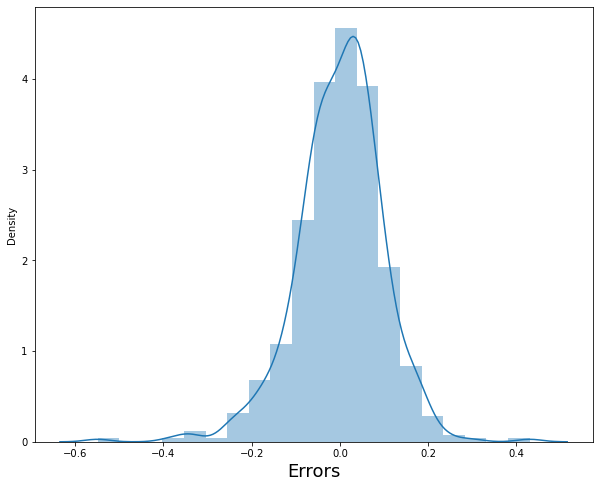

In [122]:
# Plotting a distplot for checking if the errors are distributed normally.
fig = plt.figure()
plt.figure(figsize=(10,8))
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### Assumption of Error Terms Being Independent

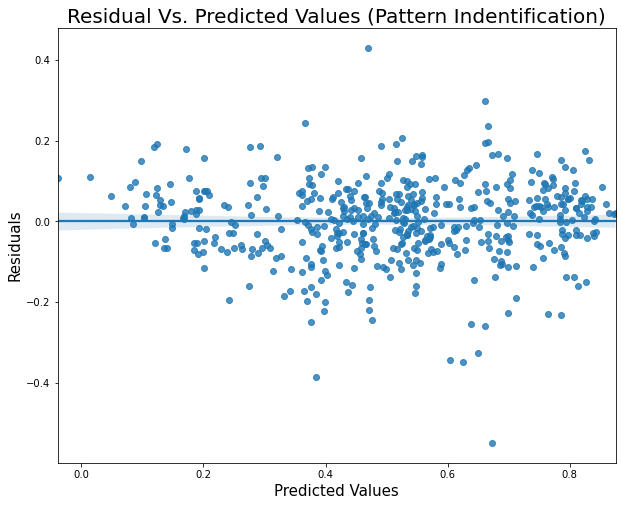

In [123]:
# Plotting the regression graph of "residual" vs "predicted values" of target variable
plt.figure(figsize=(10,8))
sns.regplot(x=y_train_Count, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

### Homoscedasticity

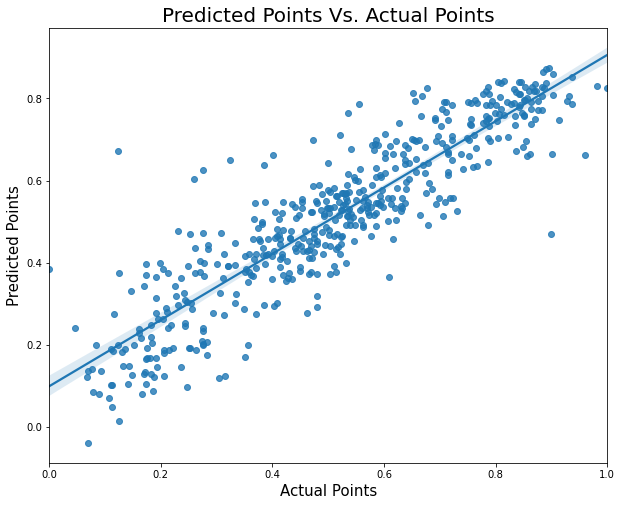

In [124]:
# Plotting the regression plot of "actual target values" vs "predicted target values"
plt.figure(figsize=(10,8))
sns.regplot(x=y_train, y=y_train_Count)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

## Model Evaluation 

In [125]:
# Transforming the values of numeric variables as required by the model
bikedf_test[num_vars]=scaler.transform(bikedf_test[num_vars])

In [126]:
# Checking if the values are transformed as required
bikedf_test.describe()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,season_spring,season_summer,season_winter,...,Month_11,Month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the test dataframe ino X and y 

In [127]:
y_test=bikedf_test.pop('Count')
X_test=bikedf_test[X_train_new.columns]

In [128]:
# Checking if the indepedent variables are in sync wiht the train variables
X_test.columns

Index(['Year', 'holiday', 'windspeed', 'season_spring', 'Month_3', 'Month_5',
       'Month_6', 'Month_8', 'Month_9',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'weekday_1', 'Month_7', 'Month_10',
       'weekday_2'],
      dtype='object')

In [129]:
# Adding the constant variable the X_test variables
X_test_m4=sm.add_constant(X_test)

In [130]:
# Predicting the values of target varible using the built model
y_pred_m4 = lm19.predict(X_test_m4)

### Predicting Test Data Using Developed Model

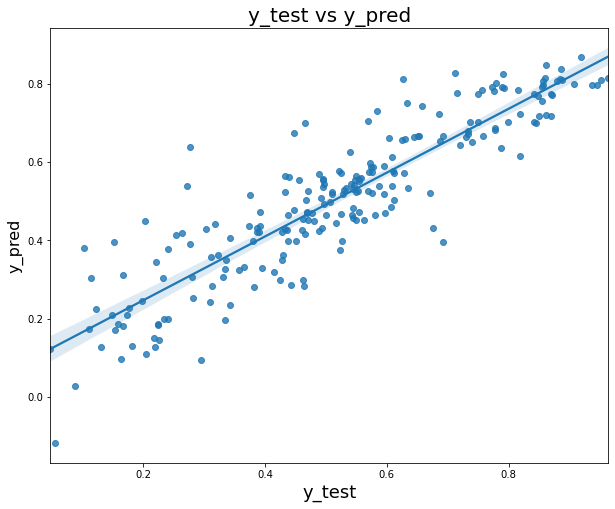

In [131]:
#Plotting the regression plot of y_test vs y_predicted to check how good the model is doing.
plt.figure(figsize=(10,8))
sns.regplot(y_test, y_pred_m4)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

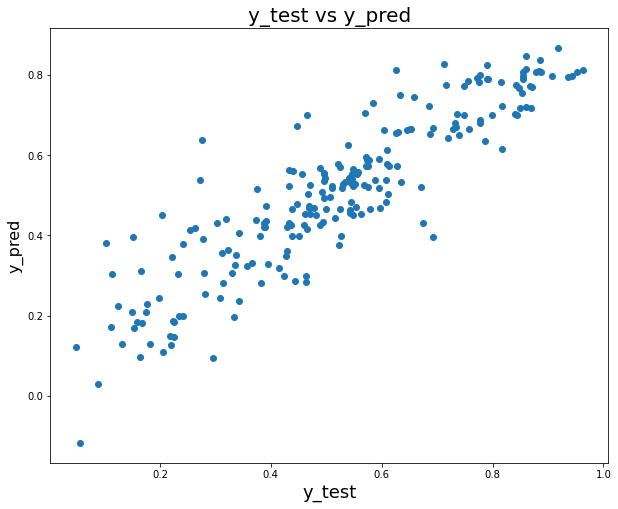

In [132]:
# Plotting scatter plot of y_test vs y_predicted
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_m4)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

In [133]:
# Calculating the R-squared value of the model on the test target variable and predicted target variable of the test dataset
r2_score(y_test,y_pred_m4)

0.802794724301199

In [134]:
# Calculating the Mean Squared Error of test dataset
np.sqrt(mean_squared_error(y_test, y_pred_m4))

0.09678028694323026

In [135]:
# Calculating the adjusted R-squared  of the model
lm19.rsquared_adj

0.8006537616744898

### We can see that the equation of our best fitted line is:
$ Count= 0.458 \times const + 0.247 \times Year - 0.077 \times holiday - 0.141\times windspeed - 0.194\times season spring + 0.069\times Month 3 + 0.115\times Month 5 + 0.143\times Month 6 + 0.143\times Month 8 + 0.181\times Month 9 - 0.305\times weathersit Light rain Light snow Thunderstorm - 0.090\times weathersit Mist cloudy - 0.033\times weekday 1 + 0.117\times Month 7 + 0.109\times Month 10 - 0.029\times  weekday 2 $